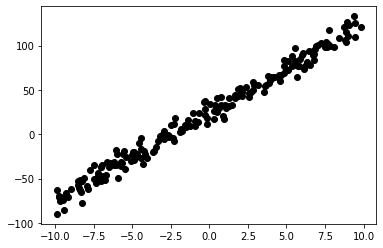

In [4]:
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/AssignmentFolder/Assignment03/data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]


inputData = plt.scatter(x_data, y_data)
plt.setp(inputData, color = 'k', linewidth = 1.0)
#plt.axis([-30, 30, 0, 150])
#plt.figure(figsize=(8, 8))

plt.show()


ERROR! Session/line number was not unique in database. History logging moved to new session 69


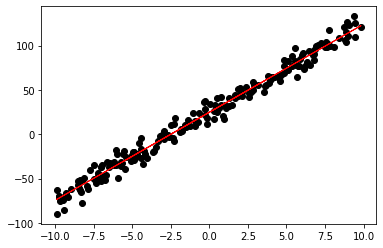

In [7]:
#iniitalize theta0, theta1
#energy J
J = 0
t0 = 0.0
t1 = 0.0

#num of data
m = x_data.size

#step_size
#if step size 'a' is a little bit big : Find faster
#if step size 'a' is very big : absolute value of cost increase continuously
#if step size 'a' is a small : Find slowly
a = 0.01

#The new line that is repected to the random dots
def hypothesis(t0, t1, x):
    return t0 * x + t1

#Lists that put data from loops
t0_list = []
t1_list = []
J_list = []

#Set infinite loops
while 1:
    h = hypothesis(t0, t1, x_data) - y_data
    #loop until convergence
    if J == np.mean(h**2) * m/2:
      break
    #Gradient Descent
    #Cost Function
    J = np.mean(h ** 2) * m / 2
    #Theta 0
    t0 = t0 - a * np.mean(h * x_data)
    #Theta 1
    t1 = t1 - a * np.mean(h)
    
    #put the data into the lists
    J_list.append(J)
    t0_list.append(t0)
    t1_list.append(t1)
    

#line1 : solution from dots obtained linear Regression
line1 = plt.plot(x_data, hypothesis(t0, t1, x_data))
inputData = plt.scatter(x_data, y_data)
plt.setp(line1, color = 'r', linewidth = 1.0)
plt.setp(inputData, color = 'k', linewidth = 1.0)
plt.show()

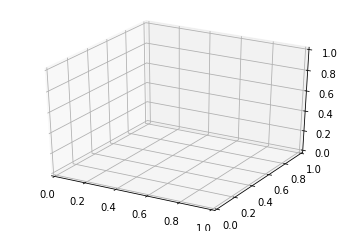

In [8]:
from mpl_toolkits.mplot3d import Axes3D

x_axis = np.arange(-30, 30, 0.1)
y_axis = np.arange(-30, 30, 0.1)

x_axis, y_axis = np.meshgrid(x_axis, y_axis)
z_axis = x_axis ** 2 + y_axis ** 2



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.plot_surface( , color = 'b')
plt.show()